<a href="https://colab.research.google.com/github/NicolasAlvess/etl_date_warehouse/blob/master/date_warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

#Aqui o codigo cria 600 produtos com id, nome e categoria.
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': np.random.choice([f'produto {i}'for i in range(1, num_produtos + 1)]),
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

#Cria um Data Frame do Pandas apartir de um dicionario ou lista de produtos.
df_produtos = pd.DataFrame(produtos)

#

num_vendas = 1000 # Cria uma lista de 1000 "vendas"
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas), #cria arrays com datas aleatorias iniciadas em 2024-04-01 e com 30 datas
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas), #
    'valor_total': np.random.randint(1000, 10000, num_vendas) #
}

#
df_vendas = pd.DataFrame(data_vendas)

#
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

#
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

#
df_merge = pd.merge(df_vendas, df_produtos, on ='produto_id', how='inner')

#
df_merge.to_csv('data_warehouse.csv', index=False)

#
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteudo do Data warehouse:")
print(df_warehouse)


Conteudo do Data warehouse:
           data  produto_id  quantidade  valor_total        nome    categoria
0    2024-04-04         113         110         8445  produto 42  Eletrônicos
1    2024-04-02         113          81         9449  produto 42  Eletrônicos
2    2024-04-13           6          91         6196  produto 42    Alimentos
3    2024-04-30           6         110         9393  produto 42    Alimentos
4    2024-04-10           6          84         5404  produto 42    Alimentos
..          ...         ...         ...          ...         ...          ...
995  2024-04-17         318          85         5326  produto 42    Alimentos
996  2024-04-04          68          54         3259  produto 42       Roupas
997  2024-04-05         570         189         3040  produto 42  Eletrônicos
998  2024-04-17          52         140         4919  produto 42       Roupas
999  2024-04-18         407          61         5735  produto 42    Alimentos

[1000 rows x 6 columns]


Analise de vendas por produto:
            quantidade  valor_total
nome                               
produto 42      125001      5523012

Analise de vendas por categoria de produto produto:
            quantidade  valor_total
nome                               
produto 42      125001      5523012

Analise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        3580       157971
2024-04-02        3957       175140
2024-04-03        3740       214692
2024-04-04        4319       195467
2024-04-05        5403       223587
2024-04-06        3446       136741
2024-04-07        4670       214452
2024-04-08        4773       199398
2024-04-09        4054       199104
2024-04-10        5699       215034
2024-04-11        4018       182822
2024-04-12        3695       179266
2024-04-13        4971       222639
2024-04-14        3625       202447
2024-04-15        4076       198892
2024-04-16        4331       167069
2024-04-17        

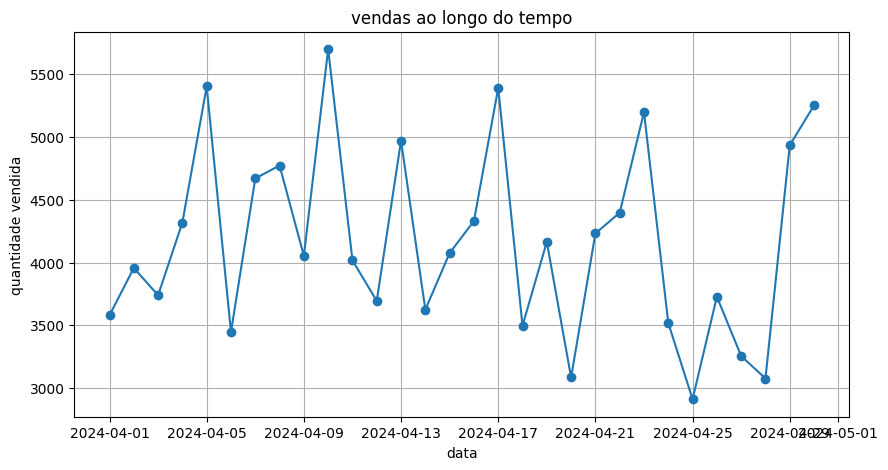


Analise de desempenho de produtos:
nome
produto 42    5523012
Name: valor_total, dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#
df_warehouse = pd.read_csv('data_warehouse.csv')

#
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']] .sum()
print("Analise de vendas por produto:")
print(vendas_por_produto)

#
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']] .sum()
print("\nAnalise de vendas por categoria de produto produto:")
print(vendas_por_produto)

#
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']] .sum()
print("\nAnalise de tendências temporais:")
print(vendas_por_data)

#
plt.figure(figsize=(10, 5 ))
plt.plot(vendas_por_data.index, vendas_por_data ['quantidade'], marker='o', linestyle='-')
plt.title('vendas ao longo do tempo')
plt.xlabel('data')
plt.ylabel('quantidade vendida')
plt.grid(True)
plt.show()

#
desempenho_produto = df_warehouse.groupby('nome') ['valor_total'].sum()
print("\nAnalise de desempenho de produtos:")
print(desempenho_produto)